# Advertising Sales Prediction using Linear Regression 📈


In this project, I analyzed how spending on TV, Radio, and Newspaper advertising affects sales.  
I used linear regression to build a predictive model and created an additional feature called `Times`,  
which combines all ad channels into one to see the total advertising impact on sales.

I started by loading the `Advertising.csv` dataset and cleaned it by dropping unnecessary columns.  
Then, I created a new feature named `Times`, which is the sum of TV, Radio, and Newspaper ad budgets.
This gives a clearer sense of total investment in advertising across all media channels.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

###  Data Visualization

Before training the model, I visualized how the `Times` feature (the combined ad spending) correlates with `Sales`.  
This helps understand the relationship between total advertising investment and sales, making sure it's linear enough for regression analysis.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df['Times']  = df['TV'] + df['Radio'] + df['Newspaper'] 

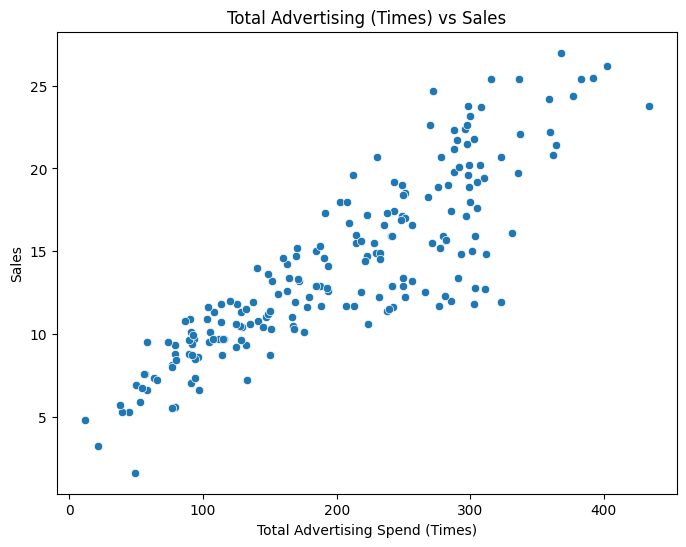

In [10]:
# Scatter plot for combined ad spending (Times) vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Times'], y=df['Sales'])
plt.title('Total Advertising (Times) vs Sales')
plt.xlabel('Total Advertising Spend (Times)')
plt.ylabel('Sales')
plt.show();

### 🧑‍💻  Model Training

Now, I will build a linear regression model using `Times` as the only feature to predict `Sales`.  
I will evaluate the model's performance with metrics such as R-squared and Mean Squared Error (MSE).


In [11]:
# Import necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X = df[['Times']]
y = df['Sales']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.415866312543217
R-squared: 0.7650262463310723


### 📈 Plotting Regression Line on Scatter Plot

To visualize how well the model fits, I plotted the regression line on top of the scatter plot.  
This gives a clear view of the relationship between total ad spending (`Times`) and `Sales`, as predicted by the linear regression model.


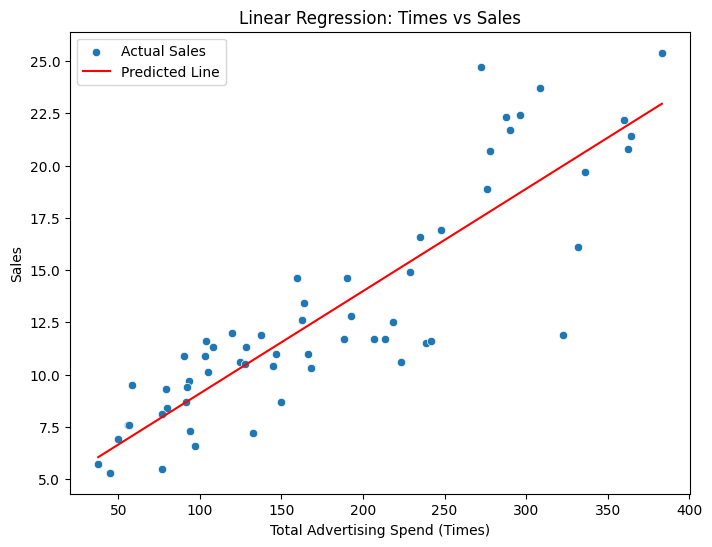

In [17]:
# Scatter plot of actual data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Times'], y=y_test, label='Actual Sales')

# Regression line
sns.lineplot(x=X_test['Times'], y=y_pred, color='red', label='Predicted Line')

# Titles and labels
plt.title('Linear Regression: Times vs Sales')
plt.xlabel('Total Advertising Spend (Times)')
plt.ylabel('Sales')
plt.legend()
plt.show()


### ✅ Conclusion

After training a linear regression model using the combined `Times` feature (TV + Radio + Newspaper) to predict `Sales`,  
I evaluated the model’s performance:

- **Mean Squared Error (MSE):** 6.42  
- **R-squared Score (R²):** 0.77  

This means that around **77% of the variance in Sales** can be explained by the total advertising budget.  
The model performs well and shows a strong linear relationship between total ad spending and sales.  
This simple regression approach using a combined feature provides a good starting point for understanding ad effectiveness.
